# Interior Point Method

![](../../assets/images/intpo_0.jpg "")

Example search for a solution. Blue lines show constraints, red points show iterated solutions ([Wikipedia](https://en.wikipedia.org/wiki/Interior-point_method)).


## Understanding The Algorithm

The core idea of the Interior Point Algorithm involves transforming a constrained optimization problem into an unconstrained one. This is achieved by incorporating a barrier function into the objective function of the optimization problem. The barrier function is a smooth convex function, defined within the interior of the feasible region of the problem, which approaches infinity as the solution approaches the boundary of this region. By doing this, the Interior Point Algorithm effectively guides the solution process to remain within the feasible region.

The Interior Point Algorithm is well-suited for large-scale linear programming problems due to its polynomial-time complexity. It has also been effectively adapted to non-linear programming, making it a versatile tool in optimization.

### Algorithm's steps and key concepts

1. **Path-following methods**: This approach involves tracking a continuous function, defined by a series of penalty parameters, through an increasing sequence. The function is optimized at each step using methods like Newton's method. The challenge here is maintaining polynomial time efficiency as the solution approaches the region's boundary.

2. **Barrier function**: Integral to path-following methods, the barrier function, often logarithmic in nature, is combined with the objective function. It ensures that as the solution nears the boundary, the function becomes steep, deterring boundary solutions.

3. **Primal-dual methods**: These methods are different from barrier methods in that they iterate through primal and dual feasible solutions, converging to the optimal solution from both sides. They are generally more efficient as they do not necessarily require separate inner and outer loops.

4. **Convergence and efficiency**: The algorithm is designed to converge to the optimal solution by progressively refining the approximation. The number of steps required for convergence depends on the complexity of the problem and the method's specific implementation, like the choice of the barrier function and update rules for the penalty parameters.

## Usage examples

1. **Finance**: The interior point method is used in finance for various applications, including portfolio management and optimization. This method helps in solving convex optimization problems, which are common in financial modeling and decision-making. It aids in finding optimal solutions for investment strategies, asset allocation, and risk management, by handling complex, multi-variable scenarios efficiently. This approach is particularly valuable due to its ability to deal with large-scale optimization problems typical in financial applications.

2. **Signal processing**: Interior point methods are crucial in the field of signal processing. They are used to solve optimization problems that arise in this area, such as filtering, signal reconstruction, and data compression. These methods are particularly useful for handling large datasets and complex signal structures, where traditional methods might be inefficient.

3. **Machine learning**: In machine learning, interior point methods are applied to solve optimization problems, especially in training models like support vector machines and deep neural networks. They help in efficiently finding the optimal parameters of these models, thus enhancing their predictive accuracy and performance.

4. **Control and mechanical engineering**: These methods are widely used in control and mechanical engineering for system design and analysis. They help in optimizing various parameters of control systems, such as stability and response time, and in mechanical engineering for designing systems with optimal structural integrity and efficiency.

5. **Digital and Analog circuit design**: In the field of electronics, particularly in the design of digital and analog circuits, interior point methods are employed to optimize circuit parameters. This ensures optimal performance, energy efficiency, and minimizes the size and cost of the circuits.

## Strengths

1. **Polynomial Runtime**: Interior point methods have a polynomial runtime for linear and non-linear convex optimization problems, contrasting with the simplex method, which can have exponential runtime in the worst case. This efficiency is achieved through self-concordant barrier functions and the path-following method, making these methods particularly suitable for solving various classes of convex programs efficiently.

2. **Handling Non-Linear Programs**: Yuri Nesterov extended the interior point method to non-linear programs. The method is effective for these programs due to the main property of the logarithmic barrier being self-concordant with a finite barrier parameter, allowing for solving many classes of convex programs in polynomial time.

3. **Efficient Convergence**: The convergence rate of interior point methods is structured, with the number of Newton steps required to transition from one approximation to the next being fixed and dependent only on specific parameters. This structured approach ensures efficient progression towards the solution.

4. **Accuracy and Complexity Management**: The solution accuracy of interior point methods is proportional to the inverse of the penalty parameter, and to achieve higher accuracy, it is sufficient to multiply the penalty parameter by a constant factor. This method controls the total complexity effectively, making it manageable for large-scale problems.

5. **Flexibility with Constraints and Objectives**: Interior point methods are versatile in handling different types of constraints and objectives. They work well with linear functions and can be adapted to various forms of convex optimization problems, making them highly adaptable to diverse data science applications.

## Weaknesses

1. **Increasing Complexity with Steeper Functions**: As the penalty parameter grows, the solution approaches the boundary, making the function steeper and increasing the runtime of solvers like Newton's method. This complexity makes it challenging to ensure that the total runtime remains polynomial.

2. **Dependency on Self-Concordant Barriers**: The method relies heavily on self-concordant barriers for the feasible region, which can be a limiting factor in certain types of optimization problems.

3. **Initial Solution Dependency**: The effectiveness of the method can be sensitive to the initial solution. Choosing a poor starting point can affect the convergence rate and overall efficiency.

4. **Complex Barrier Function Requirements**: The method requires efficiently computing the value, gradient, and Hessian of the barrier function for every point in the interior of the feasible region, which can be computationally intensive.

5. **Fixed Number of Newton Steps**: The method dictates a fixed number of Newton steps to transition from one approximation to the next, which might not be optimal for all problem types and can potentially limit its efficiency in certain cases.

## Python Demonstration

### Quadratic optimization with interior point method

 Aim to solve a quadratic optimization problem using the interior point method. <br>
 This approach is well-suited for problems where the objective function is quadratic and the constraints are linear.

#### Objective function
The objective function we're minimizing is defined as:
$ f(x) = \frac{1}{2} x^T Q x + c^T x $
where $ Q = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} $ and $ c = \begin{bmatrix} -2 \\ -1 \end{bmatrix} $. <br>
This function is quadratic, with a matrix $ Q $ defining the quadratic terms and a vector $ c $ for the linear terms.

#### Constraints

1. $ x_1 + 2x_2 \leq 1 $
2. $ -x_1 + 2x_2 \leq 1 $
3. $ 2x_1 - x_2 \leq 1 $

#### Optimization approach
The `trust-constr` method is used from SciPy's `minimize` function, which is an implementation of the interior point method. <br>
This method is particularly effective for solving large-scale convex optimization problems.

#### Path tracking
A custom class `OptimizationPath` is used to track and visualize the optimization path.

`gtol` termination condition is satisfied.
Number of iterations: 19, function evaluations: 39, CG iterations: 12, optimality: 5.26e-09, constraint violation: 0.00e+00, execution time: 0.012 s.


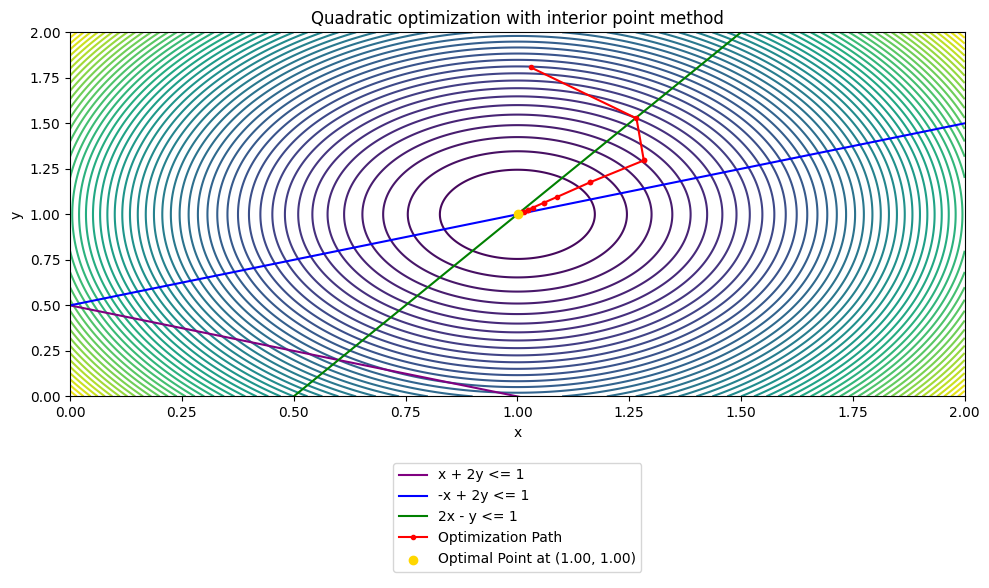

Optimal solution: [1.0023282  1.00249073]
Objective function value: -1.499991477646544


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def objective_function(x):
    """
    Define a quadratic objective function.

    Args:
    - x: A NumPy array representing the point at which the function is evaluated.

    Returns:
    - The value of the quadratic function at the given point.
    """
    Q = np.array([[2, 0], [0, 1]])  # Quadratic term coefficients
    c = np.array([-2, -1])  # Linear term coefficients
    return 0.5 * np.dot(x.T, np.dot(Q, x)) + np.dot(c, x)

# Define the constraint functions
def constraint1(x):
    return x[0] + 2 * x[1] - 1

def constraint2(x):
    return -x[0] + 2 * x[1] - 1

def constraint3(x):
    return 2 * x[0] - x[1] - 1

# Define constraints for scipy.optimize
cons = [{'type': 'ineq', 'fun': c} for c in [constraint1, constraint2, constraint3]]

class OptimizationPath:
    """
    A class to track the optimization path during the optimization process.

    Attributes:
    - path (list): A list to store the path of points visited during optimization.
    """
    def __init__(self):
        self.path = []

    def callback(self, xk, OptimizeResult): # Keep OptimizeResult
        """
        Callback function to record the current point in the optimization path.

        Args:
        - xk: Current point in the optimization algorithm.
        - OptimizeResult: The optimization result object (not used in this callback).
        """
        self.path.append(xk)

# Create an instance of the OptimizationPath class
opt_path = OptimizationPath()

## Initial first guess with random values
# Initialize a random number generator for reproducibility (edit seed)
rng_engine = np.random.default_rng(seed=None)
x0x = rng_engine.uniform(low=0, high=2)
x0y = rng_engine.uniform(low=0, high=2)
x0 = np.array([x0x, x0y])

# Perform the optimization
result = minimize(objective_function, x0, method='trust-constr', constraints=cons, callback=opt_path.callback, options={'disp': True})

# Extract the optimal solution
x_optimal = result.x


### PLOTTING

# Visualization with subplots for legend
fig_width, fig_height = 10, 6  # Width and height in inches
fig, ax = plt.subplots(2, 1, figsize=(fig_width, fig_height), gridspec_kw={'height_ratios': [3, 1]})

# Main plot
x = np.linspace(0, 2, 1000)
y = np.linspace(0, 2, 1000)
X, Y = np.meshgrid(x, y)
Z = 0.5 * (2 * X**2 + Y**2) - 2 * X - Y

ax[0].contour(X, Y, Z, 50)
ax[0].plot(x, (1 - x) / 2, 'purple', label='x + 2y <= 1')
ax[0].plot(x, (1 + x) / 2, 'b', label='-x + 2y <= 1')
ax[0].plot(x, (2*x - 1), 'g', label='2x - y <= 1')
ax[0].plot(*zip(*opt_path.path), 'ro-', markersize=3, label='Optimization Path')
ax[0].scatter(x_optimal[0], x_optimal[1], color='gold', zorder=5, label='Optimal Point')
ax[0].set_xlim(-0, 2)
ax[0].set_ylim(-0, 2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Quadratic optimization with interior point method')

# Legend in a separate subplot
ax[1].axis('off')
handles, labels = ax[0].get_legend_handles_labels()
rounded_solution = f"({x_optimal[0]:.2f}, {x_optimal[1]:.2f})"
labels[-1] += f" at {rounded_solution}"  # Append rounded solution to the label of the optimal point
ax[1].legend(handles, labels, loc='center')

plt.tight_layout()
plt.show()

# Print the optimal solution
print("Optimal solution:", x_optimal)
print("Objective function value:", objective_function(x_optimal))

End of demonstration

---
## Practical Optimization Tools

1. [**SciPy (Python):**](https://scipy.org)  A comprehensive library for scientific computing in Python, SciPy includes the `scipy.optimize` module. This module offers a range of optimization algorithms, with capabilities for linear programming using interior point methods. It's widely used due to its integration with the Python ecosystem and its balance between ease of use and powerful optimization capabilities.

2. [**CVXOPT (Python):**](https://cvxopt.org) Dedicated to convex optimization, CVXOPT provides specialized functions for solving linear and quadratic programming problems using interior point methods. It is particularly useful for problems in this domain due to its focus on convex problems, offering robust and efficient algorithm implementations.

3. [**COIN-OR (C++/Various):**](https://www.coin-or.org) An umbrella for open-source software for the operations research community, COIN-OR houses several libraries like Ipopt (Interior Point OPTimizer). Ipopt is designed for large-scale nonlinear optimization, leveraging interior point methods. This makes it ideal for complex optimization problems in both academic research and industrial applications.

4. [**GLPK (GNU Linear Programming Kit):**](https://www.gnu.org/software/glpk/) GLPK is designed for solving large-scale linear programming (LP), mixed-integer programming (MIP), and other related problems. It includes an interior point solver for LP, making it a good choice for projects that require solving these specific types of optimization problems, especially in the context of open-source and GNU-based environments.

5. [**Eigen (C++):**](https://eigen.tuxfamily.org/index.php?title=Main_Page) Primarily a linear algebra library, Eigen is known for its versatility and high performance in matrix operations. While it doesn't directly implement interior point methods, it's often used alongside other libraries to develop such solutions, especially in applications that require intensive linear algebra computations.

## Sources

| Sources |
|---------|
| [Interior-point method - Wikipedia](https://en.wikipedia.org/wiki/Interior-point_method) |
| [Interior-point method for NLP - Cornell University](http://optimization.cbe.cornell.edu/index.php?title=Interior-point_method_for_NLP) |
| [Interior-point method for LP - Cornell University](https://optimization.cbe.cornell.edu/index.php?title=Interior-point_method_for_LP) |
| [Krylov Solvers for Interior Point Methods with Applications in Radiation Therapy](https://ar5iv.labs.arxiv.org/html/2308.00637) |
| [Convex Optimization I - Stanford](https://web.stanford.edu/class/ee364a/) |